In [ ]:
pip install kaggle


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.27G/2.29G [00:14<00:00, 281MB/s]
100% 2.29G/2.29G [00:14<00:00, 167MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip -d data/


Streaming output truncated to the last 5000 lines.
  inflating: data/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0446-0001.j

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
# Define image size and batch size
img_width, img_height = 150, 150
batch_size = 32

In [ ]:
# Data augmentation and preprocessing for training and testing sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Load training data
train_generator = train_datagen.flow_from_directory(
    'data/chest_xray/train',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.


In [ ]:
# Load validation data
validation_generator = test_datagen.flow_from_directory(
    'data/chest_xray/val',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 16 images belonging to 2 classes.


In [ ]:
# Load test data (optional for evaluation after training)
test_generator = test_datagen.flow_from_directory(
    'data/chest_xray/test',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


In [ ]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - accuracy: 0.7652 - loss: 0.5289 - val_accuracy: 0.7500 - val_loss: 0.7776
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 269s 1s/step - accuracy: 0.8929 - loss: 0.2547 - val_accuracy: 0.7500 - val_loss: 0.5123
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - accuracy: 0.9100 - loss: 0.2225 - val_accuracy: 0.8750 - val_loss: 0.5294
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.9183 - loss: 0.2007 - val_accuracy: 0.6875 - val_loss: 0.7016
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.9272 - loss: 0.1792 - val_accuracy: 0.6250 - val_loss: 0.7928
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.9388 - loss: 0.1586 - val_accuracy: 0.8125 - val_loss: 0.5429
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.9412 - loss: 0.1548 - val_accuracy: 0.6250 - val_loss: 1.3359
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - accuracy: 0.9456 - loss: 0.1483 - val_accu

In [ ]:
# Save the trained model
model.save('chest_xray_cnn.h5')

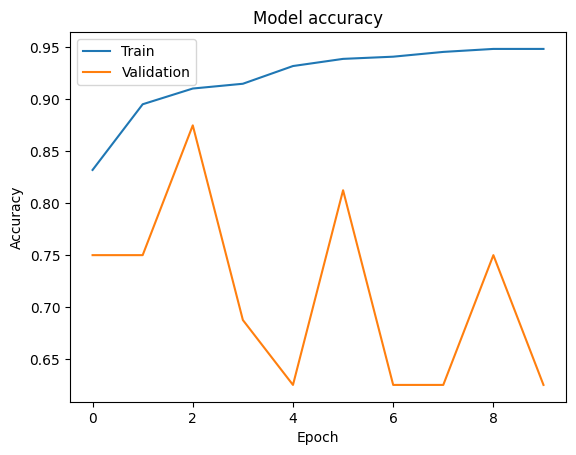

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

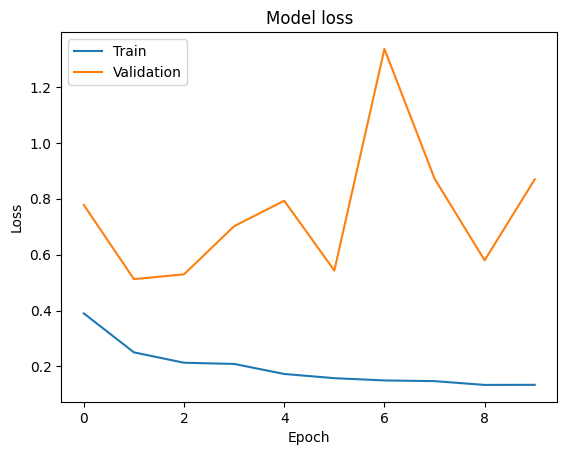

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test accuracy: {test_acc}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 415ms/step - accuracy: 0.8618 - loss: 0.4111
Test accuracy: 0.8618420958518982


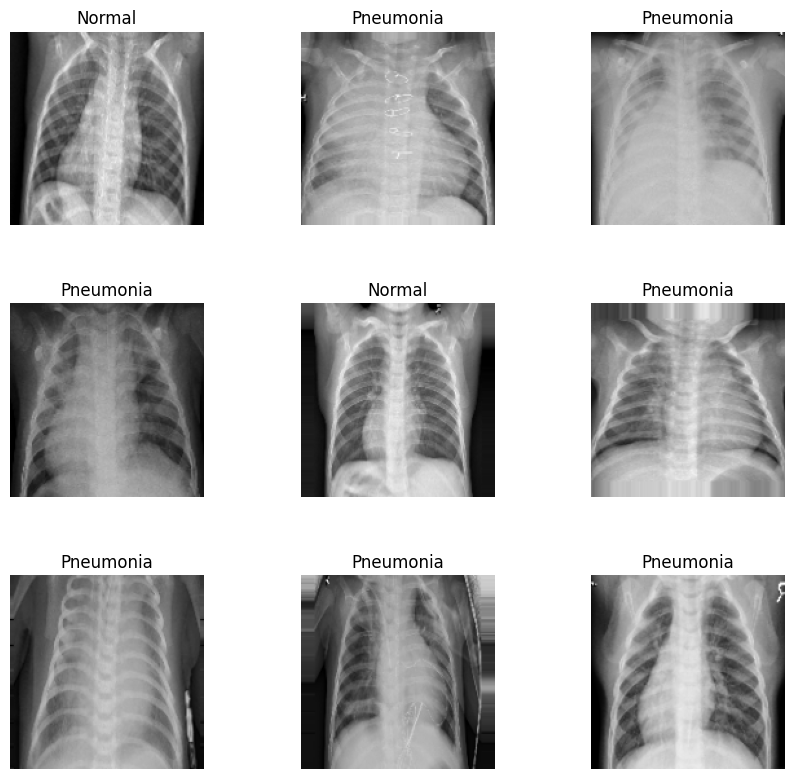

In [ ]:
# to visualize the training images in a better way
import matplotlib.pyplot as plt
import numpy as np

# Display a batch of images from the training data
def plot_images(generator):
    # Get a batch of images and labels from the generator
    images, labels = next(generator)

    # Set up the figure and axes for displaying images
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    axes = axes.ravel()

    # Plot each image in a subplot
    for i in np.arange(0, 9):
        axes[i].imshow(images[i])
        label = 'Pneumonia' if labels[i] else 'Normal'
        axes[i].set_title(label)
        axes[i].axis('off')

    plt.subplots_adjust(wspace=0.5)
    plt.show()

# Use the function to plot images from the training generator
plot_images(train_generator)


In [ ]:
# to check for a new input image
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('chest_xray_cnn.h5')


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Example usage with a new image
img_path = "x ray image.jpg"  # Assuming the image is in the current working directory
# If the image is in a different directory, provide the full path.
# For example: img_path = "/home/user/Downloads/x ray image.jpg"

preprocessed_image = preprocess_image(img_path)

# Load and preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Same size as used in training
    img_array = image.img_to_array(img)  # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension for batch size
    img_array /= 255.  # Rescale the image to the [0, 1] range
    return img_array

NameError: name 'preprocess_image' is not defined

In [ ]:
# Predict the class of the image
prediction = model.predict(preprocessed_image)

# Interpret the prediction
if prediction[0][0] > 0.5:
    print("The model predicts: Pneumonia")
else:
    print("The model predicts: Normal")


In [ ]:
import matplotlib.pyplot as plt

# Display the image
plt.imshow(image.load_img(img_path))
plt.title(f"Prediction: {'Pneumonia' if prediction[0][0] > 0.5 else 'Normal'}")
plt.axis('off')
plt.show()
